15. Plot the average delay time in function of the number of train rides per hour. Does there
seem to be a correlation?

In [1]:
import pandas as pd
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import src.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import src.data_processing.data as data

In [2]:
## loop through all train rides, count all the train rides with the same value for hour 'i' and for day 'j': in this way we can see the number of train rides per hour for e.g. the hour of 14 and day 20/9/2020. The y value we need is then the average delay time for that hour
x_values = []
y_values = []
for j in range(20, 27):
    for i in range(24):
        x_values.append(data.full_trips[(data.full_trips['Time of planned arrival'].dt.hour == i) & (data.full_trips['Date of real arrival'].dt.day == j)].shape[0])
        y_values.append(data.full_trips[(data.full_trips['Time of planned arrival'].dt.hour == i) & (data.full_trips['Date of real arrival'].dt.day == j) ]['Delay time'].mean())

In [3]:
## pair the x and y values
pairs = pd.DataFrame(list(zip(x_values, y_values)), columns=['X', 'Y'])
pairs

,X,Y
0,66,120.893939
1,26,23.038462
2,0,NaN
3,0,NaN
4,26,56.807692
...,...,...
163,2256,60.690603
164,2172,68.345764
165,2082,69.200768
166,1683,78.457516


In [5]:
## drop NaN values, since there is no delay time possible for these rows: there were no train rides during that hour (mostly between 02:00-03:00 and 03:00-04:00, then sort it to see if and how much times there is an equal number of train rides per hour
pairs = pairs.dropna()
pairs = pairs.sort_values(by = "X")
pairs


,X,Y
26,2,35.500000
148,23,39.739130
1,26,23.038462
4,26,56.807692
97,36,84.250000
...,...,...
31,4771,158.894781
79,4807,161.552112
55,4813,164.721380
127,4819,132.601162


In [6]:
## take the mean for the y values if there are cells with the same number of train rides per hour
new_pairs = pairs.groupby('X').agg({'X' : 'first', 'Y' : 'mean'})
new_pairs

,X,Y
X,,
2,2,35.500000
23,23,39.739130
26,26,39.923077
36,36,84.250000
37,37,333.243243
...,...,...
4771,4771,158.894781
4807,4807,161.552112
4813,4813,164.721380


<Figure size 640x480 with 0 Axes>

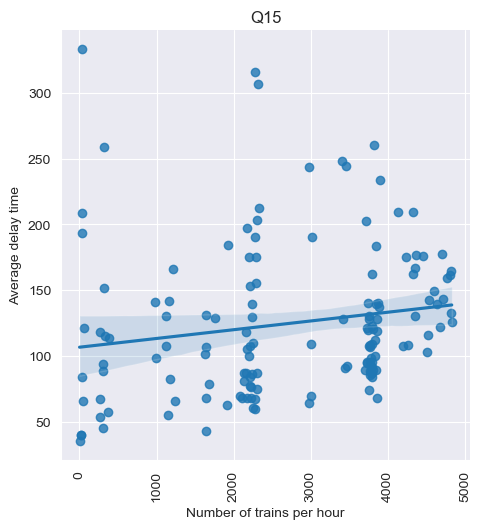

In [18]:
plt.figure(facecolor="white")
sns.lmplot(x = 'X', y = 'Y', data = new_pairs, fit_reg = True )
plt.title("Q15")
plt.xlabel("Number of trains per hour")
plt.ylabel("Average delay time")
plt.xticks(rotation= "vertical")
plt.show()

In [ ]:
## We see that the biggest delays were mostly when there were few train rides per hour: This is due to the fact that when there are few train rides per hour, it is because multiple train rides were cancelled (due to a strike e.g.). The trains that did ride that hour were then most likely to experience delays.
## On top of that, we see a small trend of increased average delay time when there are more train rides per hour.

EXTRA INSIGHTS: average delay time in function of the number of train rides per hour for the 5 stations with the most travelers:
brussel-noord/bruxelles-nord , brussel-zuid/bruxelles-midi , brussel-centraal/bruxelles-central , gent-sint-pieters , antwerpen-centraal (see Q7)


In [8]:
top5stations = ['brussel-noord/bruxelles-nord', 'brussel-zuid/bruxelles-midi', 'brussel-centraal/bruxelles-central', 'gent-sint-pieters', 'antwerpen-centraal']
x_values_extra = []
y_values_extra = []
trips_top5 = data.full_trips[data.full_trips['Name of the stop'].isin(top5stations)]
for j in range(20, 27):
    for i in range(24):
            x_values_extra.append(trips_top5[(trips_top5['Time of planned arrival'].dt.hour == i) & (trips_top5['Date of real arrival'].dt.day == j)].shape[0])
            y_values_extra.append(trips_top5[(trips_top5['Time of planned arrival'].dt.hour == i) & (trips_top5['Date of real arrival'].dt.day == j)]['Delay time'].mean())
## pair the x and y values
pairs2 = pd.DataFrame(list(zip(x_values_extra, y_values_extra)), columns=['X', 'Y'])
pairs2


,X,Y
0,8,100.875000
1,4,72.250000
2,0,NaN
3,0,NaN
4,1,8.000000
...,...,...
163,150,87.280000
164,145,49.827586
165,129,69.403101
166,116,89.939655


In [9]:
## drop NaN values, since there is no delay time possible for these rows: there were no train rides during that hour (mostly between 02:00-03:00 and 03:00-04:00, then sort it to see if and how much times there is an equal number of train rides per hour
pairs2 = pairs2.dropna()
pairs2 = pairs2.sort_values(by="X")
pairs2

,X,Y
4,1,8.000000
148,1,17.000000
1,4,72.250000
49,4,253.750000
145,4,304.250000
...,...,...
56,274,333.346715
32,280,276.689286
80,285,170.978947
104,285,281.982456


In [10]:
## take the mean for the y values if there are cells with the same number of train rides per hour
new_pairs2 = pairs2.groupby('X').agg({'X': 'first', 'Y': 'mean'})
new_pairs2

,X,Y
X,,
1,1,12.500000
4,4,176.250000
8,8,100.875000
16,16,46.275000
27,27,151.281481
...,...,...
269,269,182.031599
274,274,333.346715
280,280,276.689286


C:\Users\jonav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

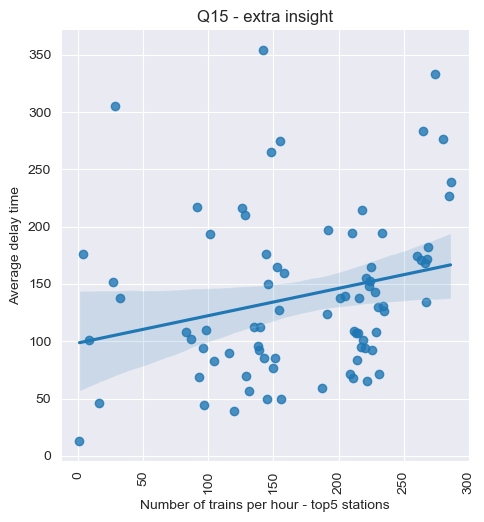

In [17]:
plt.figure(facecolor="white")
sns.lmplot('X', 'Y', data = new_pairs2, fit_reg = True)
plt.title("Q15 - extra insight")
plt.xlabel("Number of trains per hour - top5 stations")
plt.ylabel("Average delay time")
plt.xticks(rotation="vertical")
plt.show()

If we zoom in on the top 5 stations and their combined number of trains per hour, we see a clearer pattern of increased delay time when there are more numbers of trains per hour